In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import coco
import yolo
import vgg

In [2]:
repo_dir = project_name = 'COTSDataset' 
part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")

In [13]:
do_display = True
do_save = False
do_print = False

# COCO
coco_output_dir = "COCO_annotations"
coco_color = (0, 255, 0)

# YOLO
yolo_output_dir = "YOLO_annotations"
yolo_color = (0, 255, 0)

# VGG
vgg_output_dir = "VGG_annotations"
vgg_color = 'r'

In [4]:
# image_id = 0

# for image_paths in os.listdir(part2_multiple_objects):
#     mask_paths = os.path.join(part2_multiple_objects, image_paths, "masks")
#     category = image_paths
#     for mask_name in os.listdir(mask_paths):
#         image = cv2.imread(os.path.join(mask_paths, mask_name))
#         coco.annotate((image_id, mask_name, image, project_name, category, coco_output_dir),
#                       do_display, do_save, annotation_color=coco_color)
#         image_id += 1


In [5]:
im = cv2.imread('./COTSDataset/Part 2 - Multiple Objects/academic_book_no/1_colour.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mask = cv2.imread('./COTSDataset/Part 2 - Multiple Objects/academic_book_no/masks/ac_3_colour_mask_7_mask.png')

In [6]:
annotation = coco.annotate((0, 'book', mask, project_name, 'ac', coco_output_dir), do_display, do_save, annotation_color=coco_color)


 Annotating image:  book
------------------------------------------------------------------------------------------------------------------------


In [51]:
def iou(annotation):
    gt = annotation['image'][:, :, 0] > 0
    annotation_mask = np.zeros((annotation['height'], annotation['width']), dtype=np.uint8)
    cv2.drawContours(annotation_mask, annotation['contours'], -1, 255, -1)
    # resize annotation mask to gt size
    annotation_mask = cv2.resize(annotation_mask, (gt.shape[1], gt.shape[0]))
    intersection = np.logical_and(gt, annotation_mask)
    union = np.logical_or(gt, annotation_mask)
    return np.sum(intersection) / np.sum(union)

In [52]:
iou(annotation)

0.8481681880137127

In [53]:
image_id = 0

iou_sum = 0
count = 0

epsilon_tests = np.arange(0, 0.1, 0.001)
epsilon_results = {}

for epsilon in epsilon_tests:
    for image_paths in os.listdir(part2_multiple_objects):
        mask_paths = os.path.join(part2_multiple_objects, image_paths, "masks")
        category = image_paths
        for mask_name in os.listdir(mask_paths):
            image = cv2.imread(os.path.join(mask_paths, mask_name))
            annotation = coco.annotate((image_id, mask_name, image, project_name, category, coco_output_dir),
                        do_display=False, do_save=False, do_print=False, annotation_color=coco_color, epsilon=epsilon)

            # print(f'{mask_name}: {mse(annotation)}')
            image_id += 1
            iou_sum += iou(annotation)
            count += 1

    epsilon_results[epsilon] = iou_sum / count
    iou_sum = 0
    count = 0

    print(f'epsilon: {epsilon}, iou: {epsilon_results[epsilon]}')

epsilon: 0.0, iou: 0.8077630551369985
epsilon: 0.001, iou: 0.8077443498369832
epsilon: 0.002, iou: 0.808716445092134
epsilon: 0.003, iou: 0.8106615546275222
epsilon: 0.004, iou: 0.8130371270358875
epsilon: 0.005, iou: 0.8156480953615937
epsilon: 0.006, iou: 0.8185413482710041
epsilon: 0.007, iou: 0.8216769792099718
epsilon: 0.008, iou: 0.8258214355969337
epsilon: 0.009000000000000001, iou: 0.8278535365726087
epsilon: 0.01, iou: 0.8289096056794456
epsilon: 0.011, iou: 0.8308413288033473
epsilon: 0.012, iou: 0.8322529177483478
epsilon: 0.013000000000000001, iou: 0.8329842085588981
epsilon: 0.014, iou: 0.833847948945116
epsilon: 0.015, iou: 0.8343218076995008
epsilon: 0.016, iou: 0.8341700500744503
epsilon: 0.017, iou: 0.8354421608518411
epsilon: 0.018000000000000002, iou: 0.8362474257103936
epsilon: 0.019, iou: 0.8373123712177822
epsilon: 0.02, iou: 0.8379168780528345
epsilon: 0.021, iou: 0.837871289178916
epsilon: 0.022, iou: 0.8385912373797237
epsilon: 0.023, iou: 0.838479344504583
eps

In [70]:
# find largest iou
max_iou = max(epsilon_results.values())
max_iou_epsilon = [k for k, v in epsilon_results.items() if v == max_iou][0]

In [71]:
max_iou_epsilon

0.024

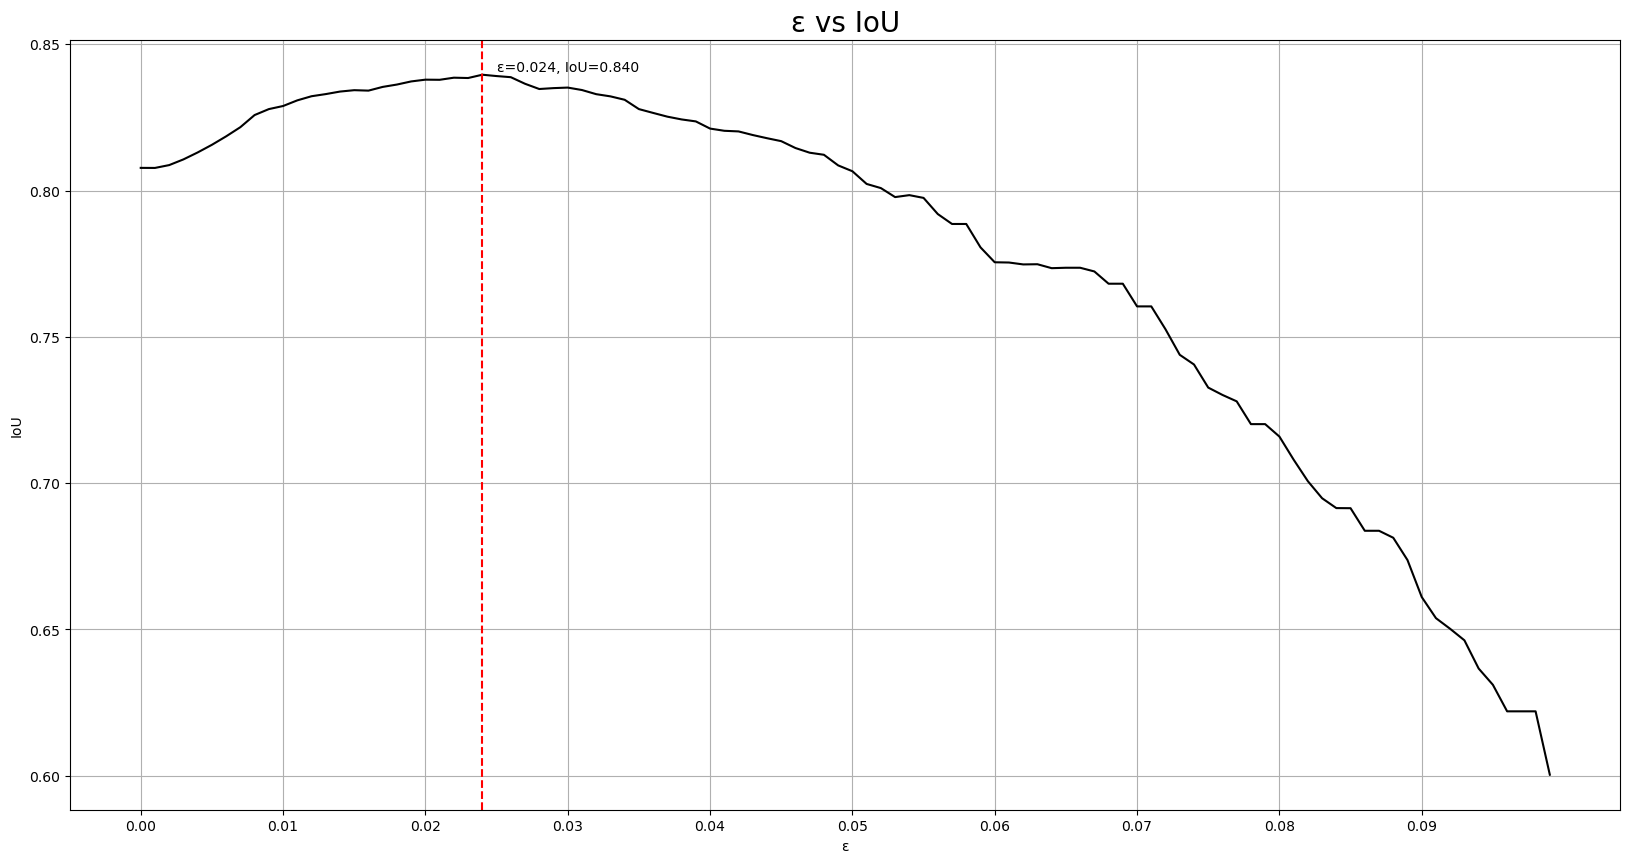

In [74]:
# plot epsilon results
plt.figure()
# black plot line
plt.plot(epsilon_results.keys(), epsilon_results.values(), color='k')

# print vertical line where max iou is
plt.axvline(x=max_iou_epsilon, color='r', linestyle='--')

# print max iou
plt.text(max_iou_epsilon + 0.001, max_iou + 0.001, f'ε={max_iou_epsilon:.3f}, IoU={max_iou:.3f}')

plt.xlabel('ε')
plt.ylabel('IoU')
plt.title('ε vs IoU')
plt.xticks(np.arange(0, 0.1, 0.01))
plt.grid()
plt.show()